In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [2]:
#0
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
#1
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
X_copy = X

In [4]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

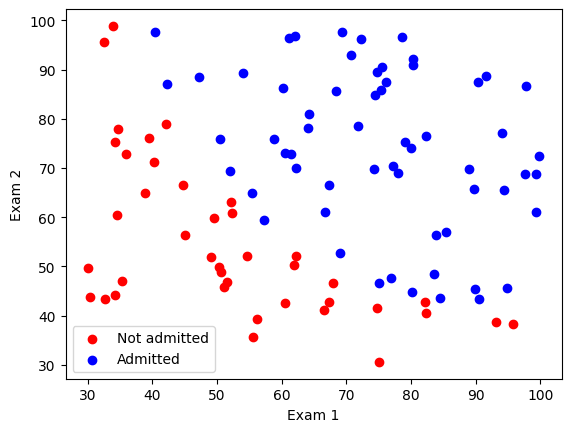

In [5]:
#2
plt.scatter(data[data['Admitted']==0]['Exam 1'],data[data['Admitted']==0]['Exam 2'], color='r', label = 'Not admitted')
plt.scatter(data[data['Admitted']==1]['Exam 1'],data[data['Admitted']==1]['Exam 2'], color='b', label = 'Admitted')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()

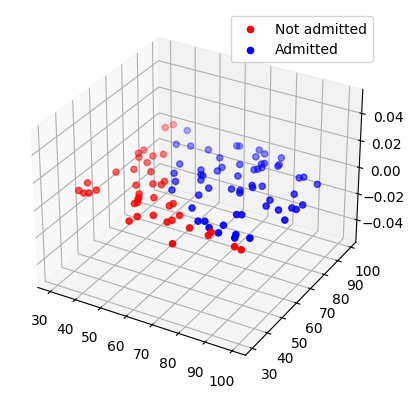

In [6]:
ax = plt.axes(projection = '3d')
ax.scatter(data[data['Admitted']==0]['Exam 1'],data[data['Admitted']==0]['Exam 2'], color='r', label = 'Not admitted')
ax.scatter(data[data['Admitted']==1]['Exam 1'],data[data['Admitted']==1]['Exam 2'], color='b', label = 'Admitted')
ax.legend()

In [7]:
#3
def sig(t):
    return 1/(1+np.exp(-t))

Text(0, 0.5, 'sig(vec)')

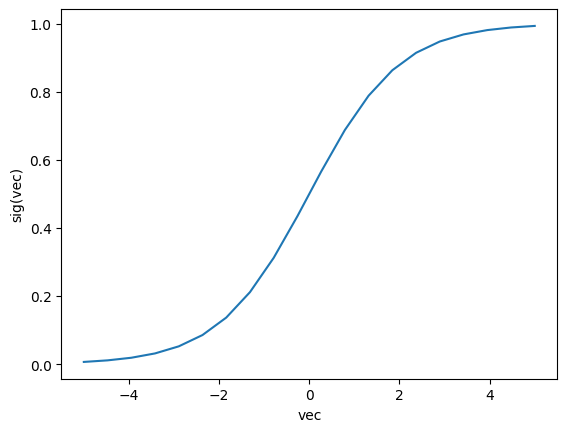

In [8]:
#4
vec = np.linspace(-5,5,20)
plt.plot(vec, sig(vec))
plt.xlabel('vec')
plt.ylabel('sig(vec)')

In [9]:
#5
def Cost(theta, X, y):
    m = len(X[0])
    return 1/m * np.sum((-y * np.log(sig(theta.T @ X))) - (1 - y) * np.log(1 - sig(theta.T @ X)))


In [10]:
theta = np.zeros((X.shape[0], 1))
print(Cost(theta, X, y))

0.6931471805599453


In [11]:
#6
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [Cost(theta, X, y)]

    return theta, cost

In [12]:
alpha = 1
it = 150

In [13]:
theta, cost = simple_gradient(X, y, theta, alpha, it)

In [14]:
theta

array([[1.41957362],
       [3.35941597],
       [3.11271333]])

In [15]:
cost[-1]

0.2064071430444978

In [16]:
#7
tab = (sig(theta.T@X) > 0.5)
accuracy= 1 / len(y[0]) * np.sum(np.abs(tab - y))
1 - accuracy

0.89

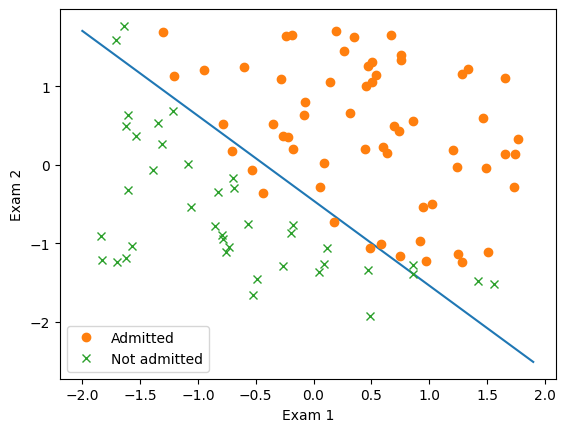

In [17]:
#8
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', label = 'Admitted')
plt.plot(X1_0, X2_0, 'x', label = 'Not admitted')
plt.legend()
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.show()

Logistic regression - Python

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [19]:

#1
logreg = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
logreg.fit(X,Y)

LogisticRegression(solver='newton-cg')

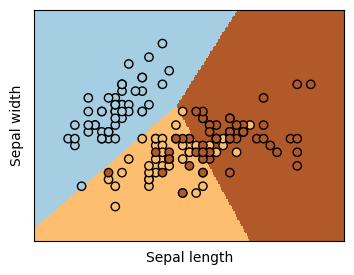

In [20]:
#2
#Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()


In [21]:
#3
predictions=logreg.predict_proba(X)

In [22]:
print("Przynalezność do setosa:")
(np.sum(predictions,axis=0)/len(Y))[0]

Przynalezność do setosa:


0.3333333333509125

In [23]:
print("Przynalezność do versicolor:")
(np.sum(predictions,axis=0)/len(Y))[1]

Przynalezność do versicolor:


0.3333333333432467

In [24]:
print("Przynalezność do virginica:")
(np.sum(predictions,axis=0)/len(Y))[2]

Przynalezność do virginica:


0.33333333330584086

In [25]:
#4
logreg.score(X, Y)

0.82

In [39]:
print("Mean Absolute Error",mean_absolute_error(Y, logreg.predict(X)))
print("Mean Square Error:",mean_squared_error(Y, logreg.predict(X)))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(Y, logreg.predict(X))))

Mean Absolute Error 0.18
Mean Square Error: 0.18
Root Mean Square Error: 0.4242640687119285
